<a href="https://colab.research.google.com/github/nackerson-ventera/demos/blob/master/purchase_loan_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purchase loan summary for Sharath roundtable

TODO intro blurb (Sharath)

## Remaining TODOs:

1.   ~Pull in additional periods (OneDrive)~ - Done 👍
2.   ~Revisit [Sharath's R-code/Data dictionary](https://venteracorp-my.sharepoint.com/:i:/g/personal/gsharathchandra_ventera_com/EWn0nSfRQRNEk_YO6jl8-2AB3WnJtzi-Qvdx9ujUjm23JQ?e=z31riG)  to fix result issue~ - Done 👍
3.   ~Add a diversity of visuals e.g. seaborn with example heatmap~ - Done 👍
4.   Nice to have a re-organize this notebook to give it clear structure (e.g. intro, imports, constants, data, etc.)
5.  What can we improve upon to make this analysis more useful?

## Data Instructions

*Protip -- I just discovered there are built in colab code snippets (pandas, reading data from google drive etc. that do most of this for us on the bottom left hand corner (third icon up from the bottom).*

**[Data Dictionary](https://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf)**


**[Dataset | Freddie Mac loan level data](https://venteracorp-my.sharepoint.com/:f:/g/personal/gsharathchandra_ventera_com/Ep31temWaaJJqKxf6V9RzoIB7qNc3nMVI_3cXGUYXObWWA?e=5%3appQ9I8&at=9)** (Use your Ventera account to access this OneDrive)



## Setup/Imports

In [56]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from google.colab import drive


# Constants

In [44]:
base_path = '/content/drive/MyDrive/sandbox/sharath/data/'
results_path = '/content/drive/MyDrive/sandbox/sharath/results/'

file_names = [f'historical_data_{year}Q{quarter}.txt' for year in [2021, 2022] for quarter in ['Q1', 'Q2', 'Q3', 'Q4']]

# Column Names and Data Types
column_names = ['Loan Purpose', 'Original LTV', 'Credit Score', 'Original DTI Ratio']
dtypes = {'Loan Purpose': str, 'Original LTV': float, 'Credit Score': int, 'Original DTI Ratio': float}

chunksize = 10 ** 6

# Data Loading

In [57]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/sandbox/sharath/'data'

historical_data_2021Q1.txt  historical_data_2022Q1.txt
historical_data_2021Q2.txt  historical_data_2022Q2.txt
historical_data_2021Q3.txt  historical_data_2022Q3.txt
historical_data_2021Q4.txt  historical_data_2022Q4.txt


## Data Pre-proc



In [49]:
column_names = [
    "Credit Score", "First Payment Date", "First Time Homebuyer Flag", "Maturity Date",
    "MSA", "MI Percentage", "Number of Units", "Occupancy Status", "Original CLTV",
    "Original DTI Ratio", "Original UPB", "Original LTV", "Original Interest Rate",
    "Channel", "PPM Flag", "Amortization Type", "Property State", "Property Type",
    "Postal Code", "Loan Sequence Number", "Loan Purpose", "Original Loan Term",
    "Number of Borrowers", "Seller Name", "Servicer Name", "Super Conforming Flag",
    "Pre-HARP Loan Sequence Number", "Program Indicator", "HARP Indicator",
    "Property Valuation Method", "Interest Only Indicator", "MI Cancellation Indicator"
]

# Define the data types for each column to optimize memory usage
dtypes = {
    'Credit Score': 'Int64',
    'First Payment Date': 'str',
    'First Time Homebuyer Flag': 'category',
    'Maturity Date': 'str',
    'MSA': 'Int64',
    'MI Percentage': 'Int64',
    'Number of Units': 'Int64',
    'Occupancy Status': 'category',
    'Original CLTV': 'float',
    'Original DTI Ratio': 'float',
    'Original UPB': 'Int64',
    'Original LTV': 'float',
    'Original Interest Rate': 'float',
    'Channel': 'category',
    'PPM Flag': 'category',
    'Amortization Type': 'category',
    'Property State': 'category',
    'Property Type': 'category',
    'Postal Code': 'Int64',
    'Loan Sequence Number': 'str',
    'Loan Purpose': 'category',
    'Original Loan Term': 'Int64',
    'Number of Borrowers': 'Int64',
    'Seller Name': 'str',
    'Servicer Name': 'str',
    'Super Conforming Flag': 'category',
    'Pre-HARP Loan Sequence Number': 'str',
    'Program Indicator': 'category',
    'HARP Indicator': 'category',
    'Property Valuation Method': 'Int64',
    'Interest Only Indicator': 'category',
    'MI Cancellation Indicator': 'category'
}

In [51]:
# 8/12 refactor
years = [2021, 2022]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

all_data_chunks = []

for year in years:
    for quarter in quarters:
        file_path = base_path + f'historical_data_{year}{quarter}.txt'

        data_chunk = pd.read_csv(file_path,
                                 delimiter='|',
                                 names=column_names,
                                 dtype=dtypes,
                                 nrows=10)

        all_data_chunks.append(data_chunk)

all_data = pd.concat(all_data_chunks, ignore_index=True)

all_data

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,MSA,MI Percentage,Number of Units,Occupancy Status,Original CLTV,Original DTI Ratio,...,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only Indicator,MI Cancellation Indicator
0,725,202103,Y,205102,15804,0,1,P,80.0,30.0,...,1,"WELLS FARGO BANK, N.A.","WELLS FARGO BANK, N.A.",NaN,NaN,9,NaN,2,N,7
1,737,202103,N,205102,<NA>,0,1,P,74.0,27.0,...,2,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,2,N,7
2,744,202105,N,204104,48864,6,1,P,85.0,34.0,...,1,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,1,N,Y
3,676,202104,N,204103,<NA>,0,1,P,79.0,23.0,...,2,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,2,N,7
4,765,202103,N,203602,12700,0,1,S,60.0,43.0,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,784,202212,N,205211,30460,0,1,P,78.0,40.0,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
76,619,202212,Y,205211,41180,0,1,P,67.0,42.0,...,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N,7
77,743,202212,N,203711,47664,0,1,P,35.0,30.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
78,696,202212,N,205211,41180,0,1,P,79.0,39.0,...,2,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,NaN,NaN,9,NaN,2,N,7


## Analysis and visualization

*   Volume Analysis
*   Interest Rate Analysis
*   Loan Summary

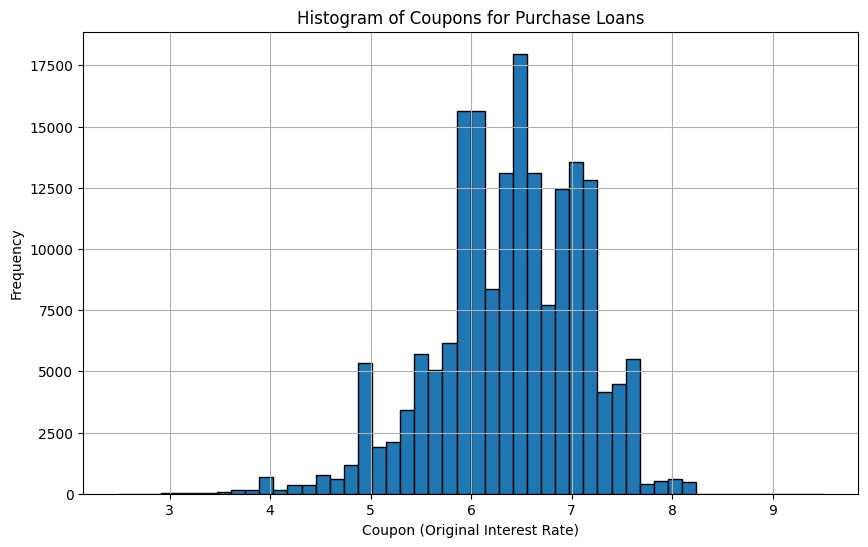

In [52]:
interest_rates = []
#Data
for chunk in pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         chunksize=chunksize):

    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']

    interest_rates.extend(purchase_loans['Original Interest Rate'].values)

interest_rates = pd.Series(interest_rates)

# Plot
plt.figure(figsize=(10,6))
plt.hist(interest_rates, bins=50, edgecolor='black')
plt.title('Histogram of Coupons for Purchase Loans')
plt.xlabel('Coupon (Original Interest Rate)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

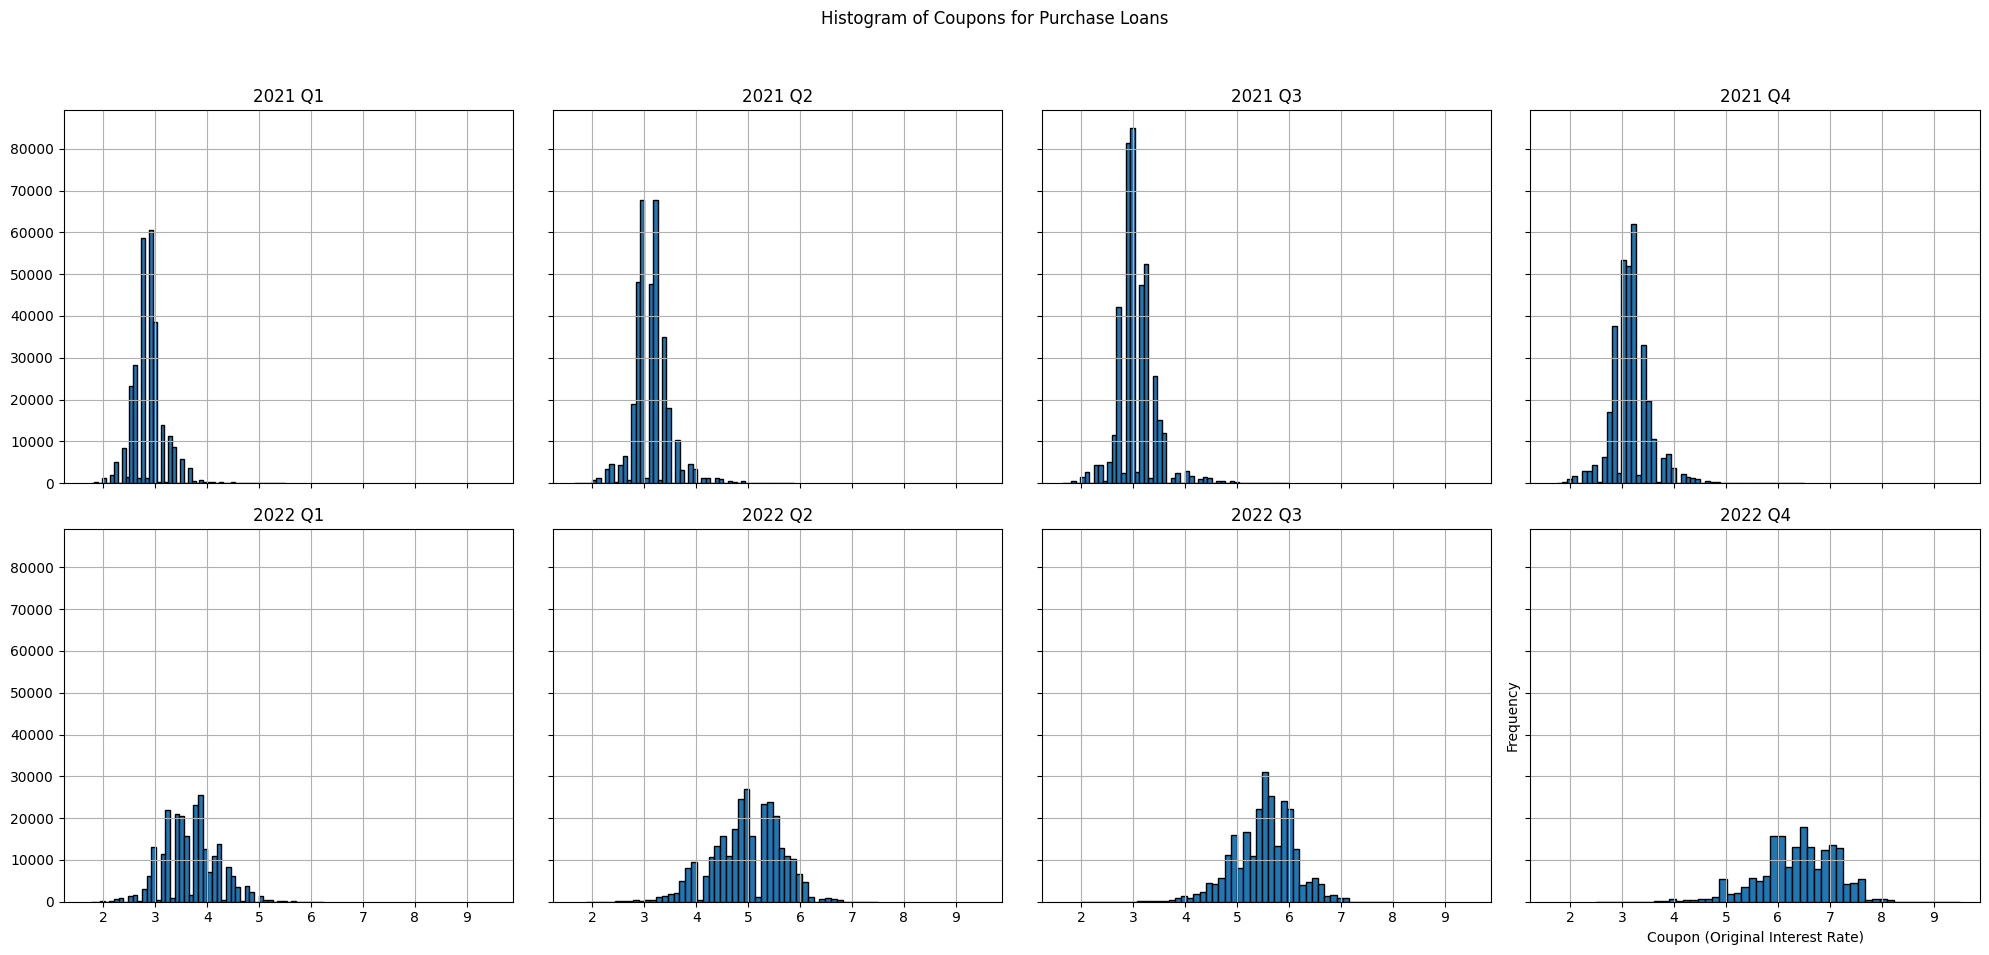

In [58]:
# 8/12 refactor

years = [2021, 2022]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
chunksize = 10 ** 6

# Create a 2x4 grid for subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)

# Iterate through years
for row, year in enumerate(years):
    # Iterate through quarters
    for col, quarter in enumerate(quarters):
        file_path = base_path + f'historical_data_{year}{quarter}.txt'
        interest_rates = []

        for chunk in pd.read_csv(file_path,
                                 delimiter='|',
                                 names=column_names,
                                 dtype=dtypes,
                                 chunksize=chunksize):

            purchase_loans = chunk[chunk['Loan Purpose'] == 'P']
            interest_rates.extend(purchase_loans['Original Interest Rate'].values)

        interest_rates = pd.Series(interest_rates)

        # Plot histogram for the specific year and quarter
        axes[row, col].hist(interest_rates, bins=50, edgecolor='black')
        axes[row, col].set_title(f'{year} {quarter}')
        axes[row, col].grid(True)

plt.suptitle('Histogram of Coupons for Purchase Loans')
plt.xlabel('Coupon (Original Interest Rate)')
plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

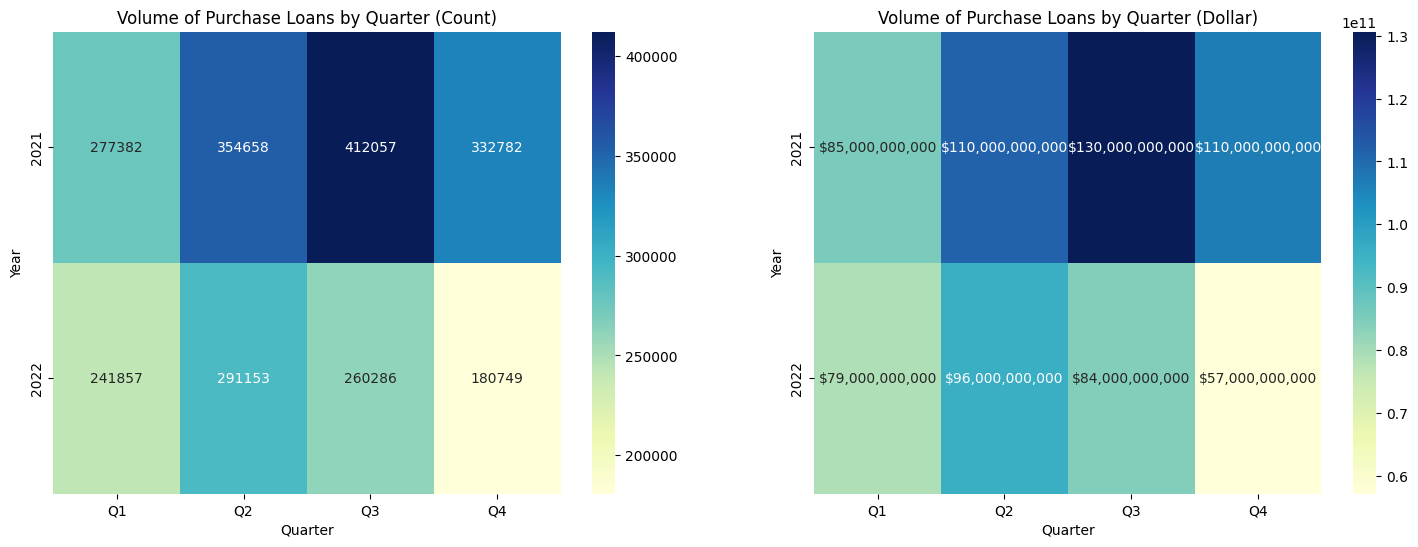

In [62]:
# DF to store  results
heatmap_data = pd.DataFrame({
    'Year': [y for y in years for _ in quarters] * 2,
    'Quarter': quarters * len(years) * 2,
    'Value': loan_counts + dollar_volumes,
    'Metric': ['Count'] * len(loan_counts) + ['Dollar'] * len(dollar_volumes)
})

# Data
count_pivot = heatmap_data[heatmap_data['Metric'] == 'Count'].pivot_table(index='Year', columns='Quarter', values='Value', aggfunc='sum')
dollar_pivot = heatmap_data[heatmap_data['Metric'] == 'Dollar'].pivot_table(index='Year', columns='Quarter', values='Value', aggfunc='sum')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Count
sns.heatmap(count_pivot, annot=True, cmap='YlGnBu', fmt='.0f', ax=axes[0])
axes[0].set_title('Volume of Purchase Loans by Quarter (Count)')

# Plot $$
sns_dollar = sns.heatmap(dollar_pivot, annot=True, cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Volume of Purchase Loans by Quarter (Dollar)')

# Update annotations to currency format
for text in axes[1].texts:
    text.set_text(f"${float(text.get_text()):,.0f}")

plt.show()

In [31]:
# Volume of purchase loans

count_purchase_loans = 0
dollar_volume_purchase_loans = 0

for chunk in pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         chunksize=chunksize):

    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']
    count_purchase_loans += len(purchase_loans)
    dollar_volume_purchase_loans += purchase_loans['Original UPB'].sum()

count_purchase_loans, dollar_volume_purchase_loans

# lets throw this out onto a DF
volume_summary = pd.DataFrame({
    'Metric': ['Number of Purchase Loans', 'Total Dollar Volume of Purchase Loans'],
    'Value': [count_purchase_loans, dollar_volume_purchase_loans]
})

volume_summary['Value'] = volume_summary['Value'].apply(lambda x: f'{x:,.0f}' if x != count_purchase_loans else x)

# Displaying the DataFrame
volume_summary



,Metric,Value
0,Number of Purchase Loans,180749
1,Total Dollar Volume of Purchase Loans,"57,140,784,000"


## Percentage of purchased loans

*   LTV >= 95: ~ 27.29%
*   FICO < 680: approximately 5.93%
*   DTI > 45: approximately 12.90%





In [39]:
# 8/12 refactor - Percentage of purchased loans

def calculate_percentage(purchase_loans, condition):
    valid_loans = purchase_loans[condition(purchase_loans)]
    return len(valid_loans) / len(purchase_loans) * 100 if not purchase_loans.empty else 0

conditions = {
    "LTV >= 95%": lambda x: (x['Original LTV'] >= 95) & (x['Original LTV'] != 999),
    "FICO < 680": lambda x: (x['Credit Score'] < 680) & (x['Credit Score'] != 9999),
    "DTI > 45%": lambda x: (x['Original DTI Ratio'] > 45) & (x['Original DTI Ratio'] != 999)
}

results = {key: 0 for key in conditions.keys()}

for chunk in pd.read_csv(file_path, delimiter='|', names=column_names, dtype=dtypes, chunksize=chunksize):
    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']

    for key, condition in conditions.items():
        results[key] += calculate_percentage(purchase_loans, condition)

# Create DataFrame and print
results_df = pd.DataFrame(list(results.items()), columns=['Criteria', 'Percentage'])
results_df



,Criteria,Percentage
0,LTV >= 95%,27.896697
1,FICO < 680,5.438481
2,DTI > 45%,22.561674


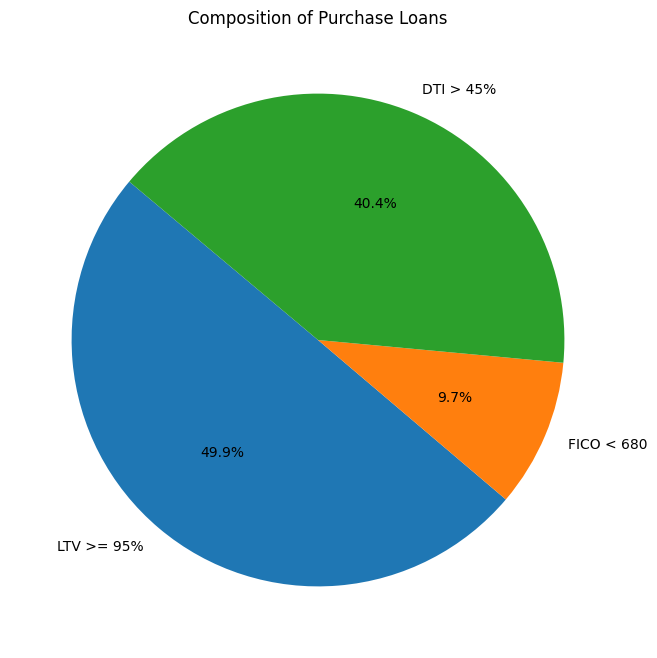

In [27]:
# Data
labels = ['LTV >= 95%', 'FICO < 680', 'DTI > 45%']
percentages = [percentage_LTV_ge_95, percentage_FICO_lt_680, percentage_DTI_gt_45]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Purchase Loans')
plt.show()


# Export Results

In [43]:
# Define the path for the new results folder
results_path = '/content/drive/MyDrive/sandbox/sharath/results/'

os.makedirs(results_path, exist_ok=True)
csv_file_path = os.path.join(results_path, 'sharath_summary.csv')

results_df.to_csv(csv_file_path, index=False)
print(f"File successfully saved at {csv_file_path}")


File successfully saved at /content/drive/MyDrive/sandbox/sharath/results/sharath_summary.csv


In [42]:
!ls /content/drive/MyDrive/sandbox/sharath/'results'

sharath_summary.csv


# COnclusion